In [128]:
from utils.visual import *
import torch
import matplotlib.pyplot as plt 
import os

In [129]:
n_iterations = 5
paths = [
    "magnetoionic/2024-06-19-13h37:12-Magnetoionic-BS128-1024-MNIST-relu-v1",
    "magnetoionic/2024-06-19-13h38:06-Magnetoionic-BS128-1024-MNIST-relu-v1"
]

models = []
for path in paths:
    accuracies = []
    for it in range(n_iterations):
        accuracies.append(torch.load(os.path.join(path, f"params-network-{it}", "accuracy.pt")))
    models.append(accuracies)

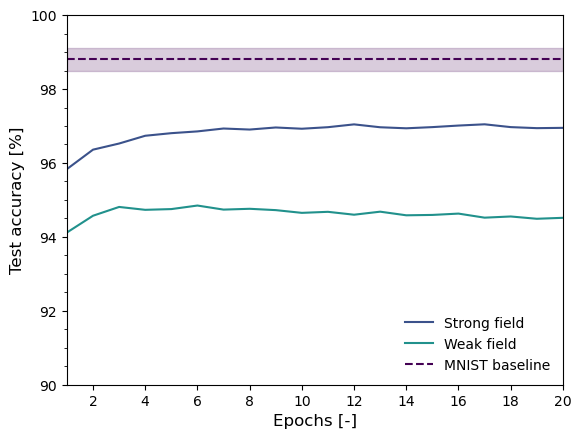

In [134]:
fig, ax = plt.subplots()
palette = plt.get_cmap('viridis', len(models)+3)
# add mnist baseline 98.6% +- 0.3%
ax.hlines(98.8, 1, 20, color=palette(0), linestyle='--', label="MNIST baseline")
ax.fill_between([1, 20], 98.5, 99.1, alpha=0.2, color=palette(0))
# compare models
names = ["Strong field", "Weak field"] 
for i, model in enumerate(models):
    mean = torch.mean(torch.tensor(model), dim=0).squeeze(1)
    std = torch.std(torch.tensor(model), dim=0).squeeze(1)
    # add one element to the beginning of the tensor
    mean = torch.cat((torch.tensor([0.0]), mean))
    std = torch.cat((torch.tensor([0.0]), std))
    ax.plot(mean*100, label=f"{names[i]}", color=palette(i+1))
    ax.fill_between(mean - std, mean + std, alpha=0.2, color=palette(i+1))

ax.set_xlabel("Epochs [-]", fontsize=12)
ax.set_ylabel("Test accuracy [%]", fontsize=12)
ax.legend(loc='lower right', fontsize=10, frameon=False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylim([90, 100])
ax.set_xticks(range(0, 21,2))
ax.set_xlim([1, 20])

plt.show()
# save as pdf and svg
name = versionning("magnetoionic", "weak-vs-strong", ".pdf")
fig.savefig(f"{name}", format="pdf")
name = versionning("magnetoionic", "weak-vs-strong", ".svg")
fig.savefig(f"{name}", format="svg")
    

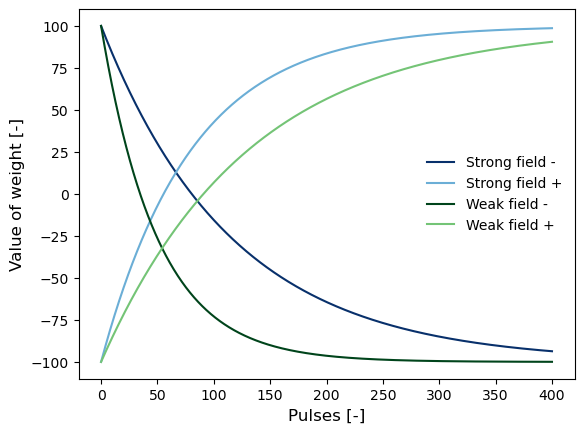

In [133]:

f_strong_minus = lambda x: -100 + 200*torch.exp(-x/116)
f_strong_plus = lambda x: 100 - 200*torch.exp(-x/80)
f_weak_minus = lambda x: -100 + 200*torch.exp(-x/50)
f_weak_plus = lambda x: 100 - 200*torch.exp(-x/131)
# plot all functions
fig, ax = plt.subplots()
x = torch.linspace(0, 400, 1000)
shades_blue = plt.get_cmap('Blues_r', 3)
shades_green = plt.get_cmap('Greens_r', 3)
ax.plot(x, f_strong_minus(x), label="Strong field -", color=shades_blue(0))
ax.plot(x, f_strong_plus(x), label="Strong field +", color=shades_blue(1))
ax.plot(x, f_weak_minus(x), label="Weak field -", color=shades_green(0))
ax.plot(x, f_weak_plus(x), label="Weak field +", color=shades_green(1))
ax.legend(loc='center right', fontsize=10, frameon=False)
ax.set_xlabel("Pulses [-]", fontsize=12)
ax.set_ylabel("Value of weight [-]", fontsize=12)
# export
name = versionning("magnetoionic", "weight-evolution", ".pdf")
fig.savefig(f"{name}", format="pdf")
name = versionning("magnetoionic", "weight-evolution", ".svg")
fig.savefig(f"{name}", format="svg")